In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
df = pd.read_csv('weather_data.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [72]:
df.shape

(5999, 12)

In [73]:
list(df.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [74]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


### 1 Data Cleaning

In [75]:
# removed "Loud cover since all the values are 0s"

cols = [
 'Summary',
 'Precip Type',
 'Loud Cover',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Daily Summary']

In [76]:
df = df.drop(cols, axis=1)

In [77]:
df.iloc[1464]

Formatted Date              2006-12-01 00:00:00.000 +0100
Temperature (C)                                  6.572222
Apparent Temperature (C)                         5.416667
Humidity                                             0.93
Wind Speed (km/h)                                    6.44
Pressure (millibars)                              1038.06
Name: 1464, dtype: object

In [78]:
# Converting Formatted Date from object to DateTimeObject
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Temperature (C)           5999 non-null   float64            
 2   Apparent Temperature (C)  5999 non-null   float64            
 3   Humidity                  5999 non-null   float64            
 4   Wind Speed (km/h)         5999 non-null   float64            
 5   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 281.3 KB


In [79]:
df.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'],
      dtype='object')

In [80]:
# Indexing according to date and time

# First we sort values
indexed_df = df.sort_values(['Formatted Date'])
indexed_df.head(5)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
2880,2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2881,2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2882,2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2883,2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2884,2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [81]:
# Setting the index

indexed_df = indexed_df.set_index('Formatted Date')
indexed_df.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [82]:
# Removing duplicated values according to the index/date

indexed_df.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [83]:
# Checking for Na. If there is any we would go for .drop
indexed_df.isna().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Pressure (millibars)        0
dtype: int64

In [84]:
indexed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2005-12-31 23:00:00+00:00 to 2006-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 410.2 KB


### 2 Exploration analysis

<Axes: xlabel='Formatted Date'>

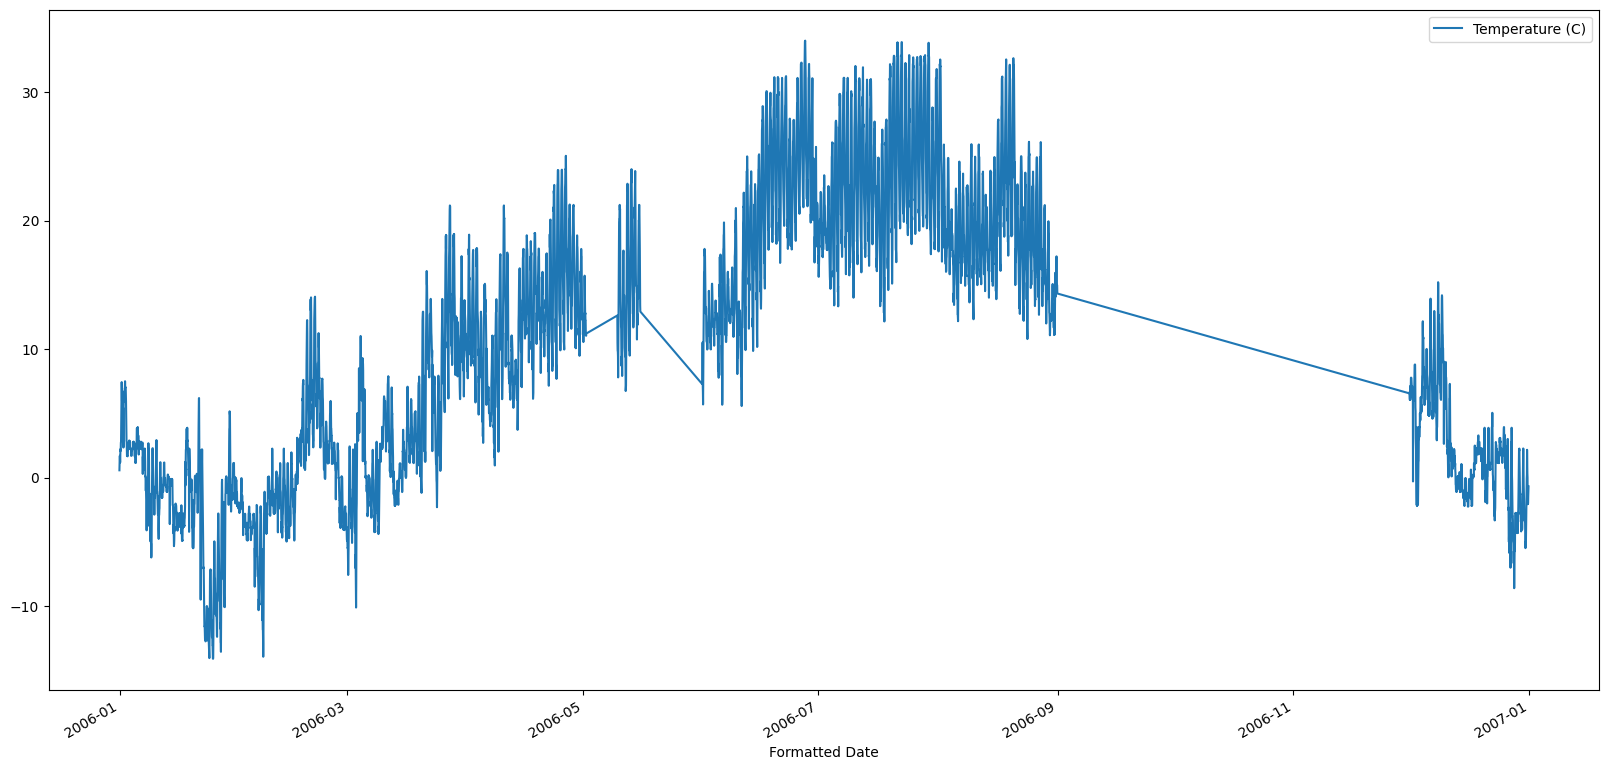

In [85]:
indexed_df.plot(y = 'Temperature (C)', figsize=(20,10))

In [86]:
# Resampling the data into day format

indexed_df2 = indexed_df.resample(rule='D').mean()
indexed_df2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


<Axes: xlabel='Formatted Date'>

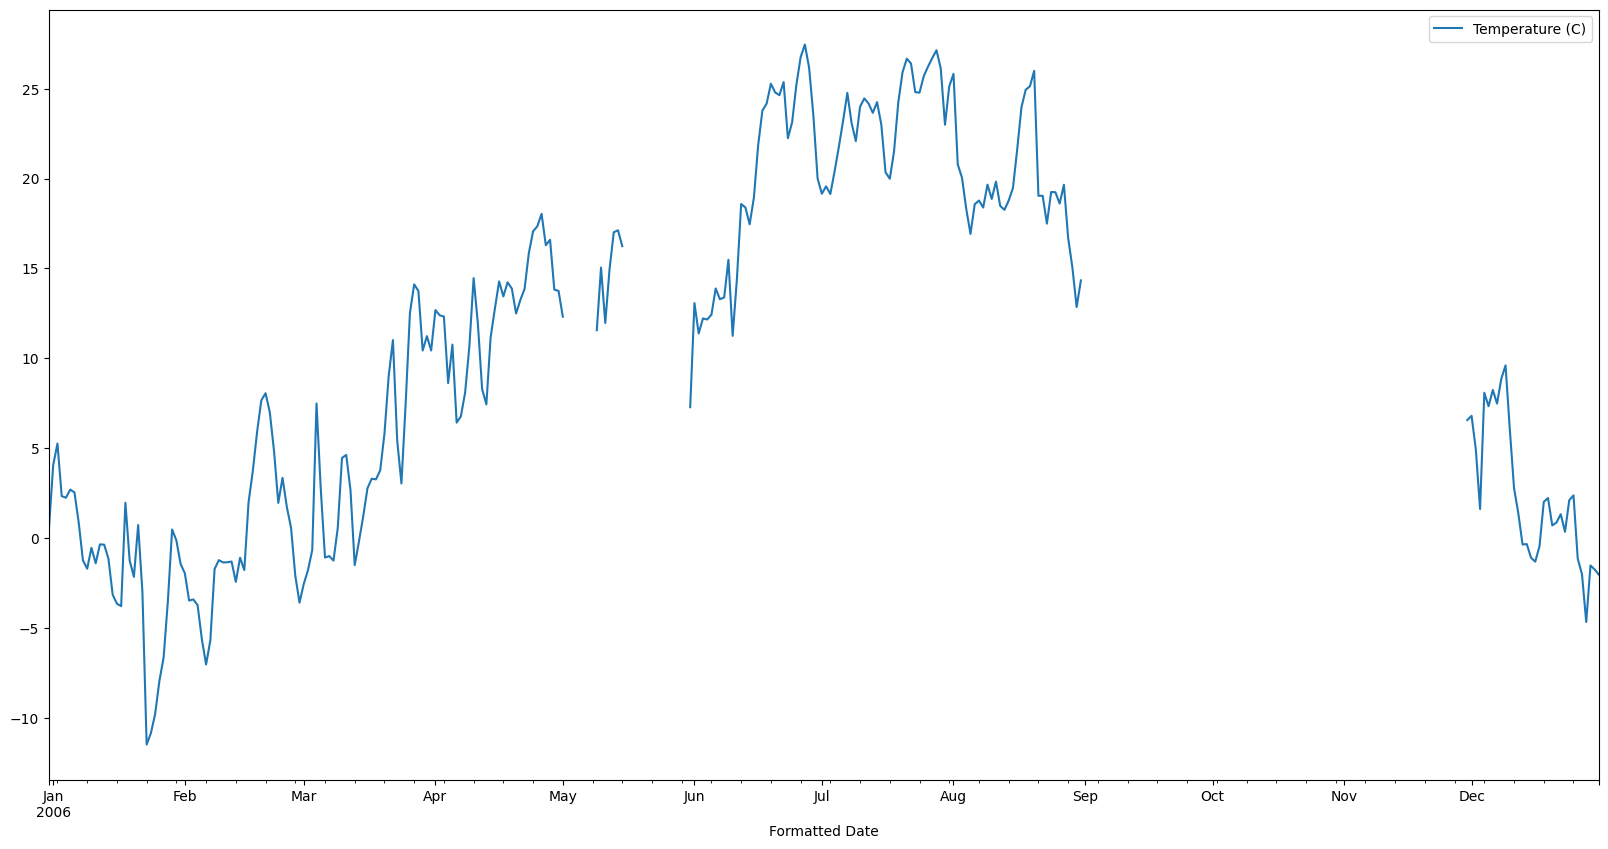

In [87]:
indexed_df2.plot(y = "Temperature (C)", figsize=(20,10))

<Axes: xlabel='Formatted Date'>

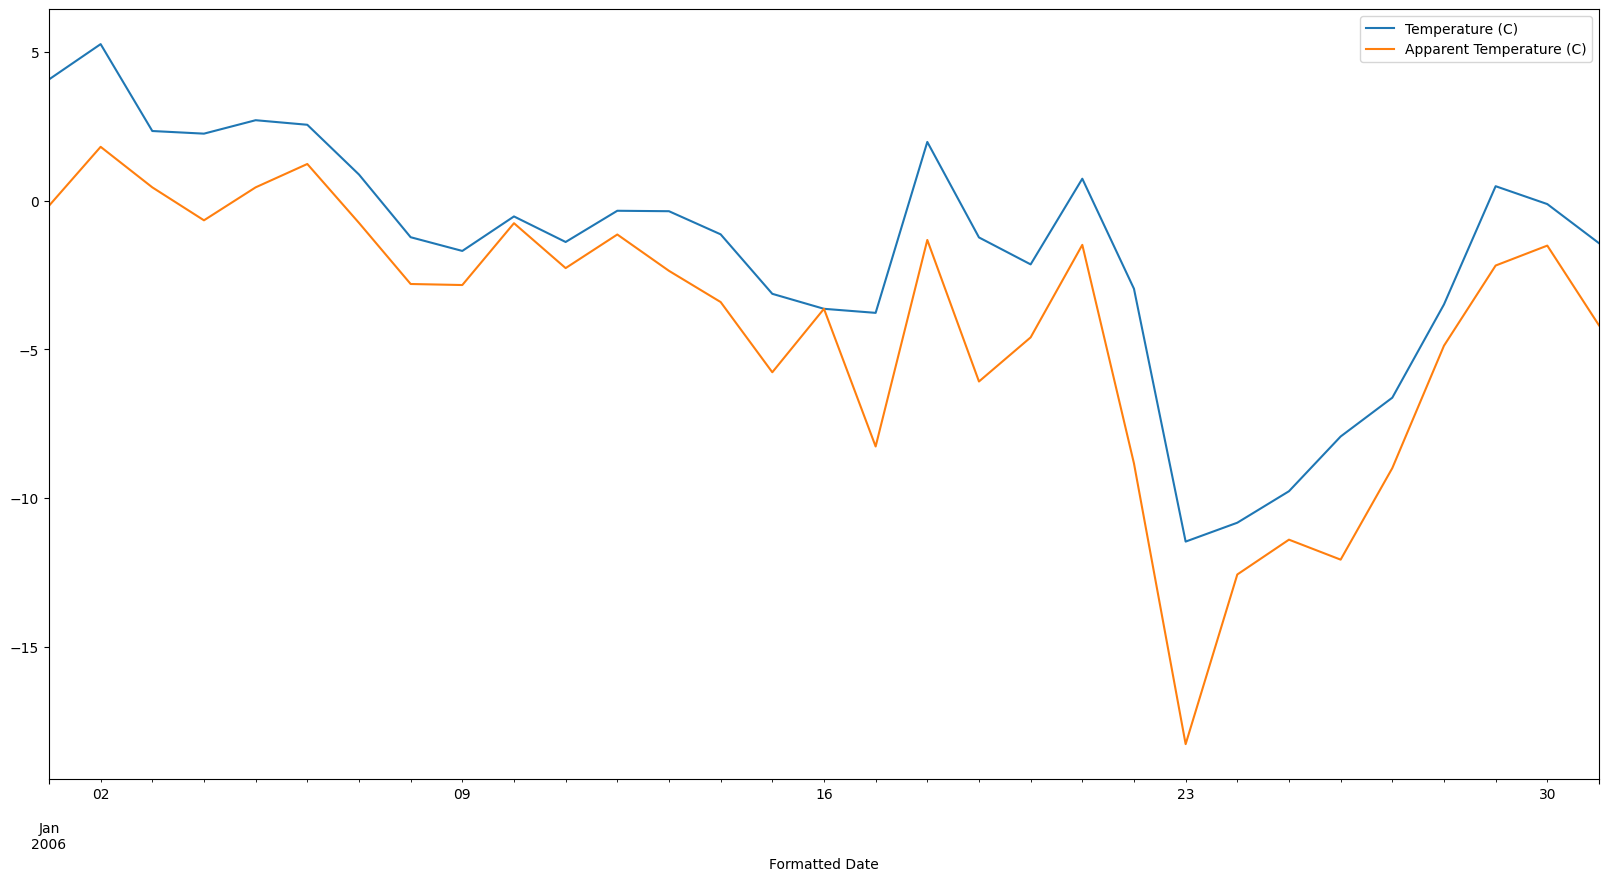

In [88]:
jan2006 = indexed_df2['2006-01-01':'2006-01-31']
jan2006.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))

In [89]:
winter = indexed_df2['2006-01-01':'2006-02-28']
winter2 = indexed_df2['2006-12-02':'2006-12-31']
spring = indexed_df2['2006-03-01':'2006-05-31']
summer = indexed_df2['2006-06-01':'2006-08-31']

<Axes: xlabel='Formatted Date'>

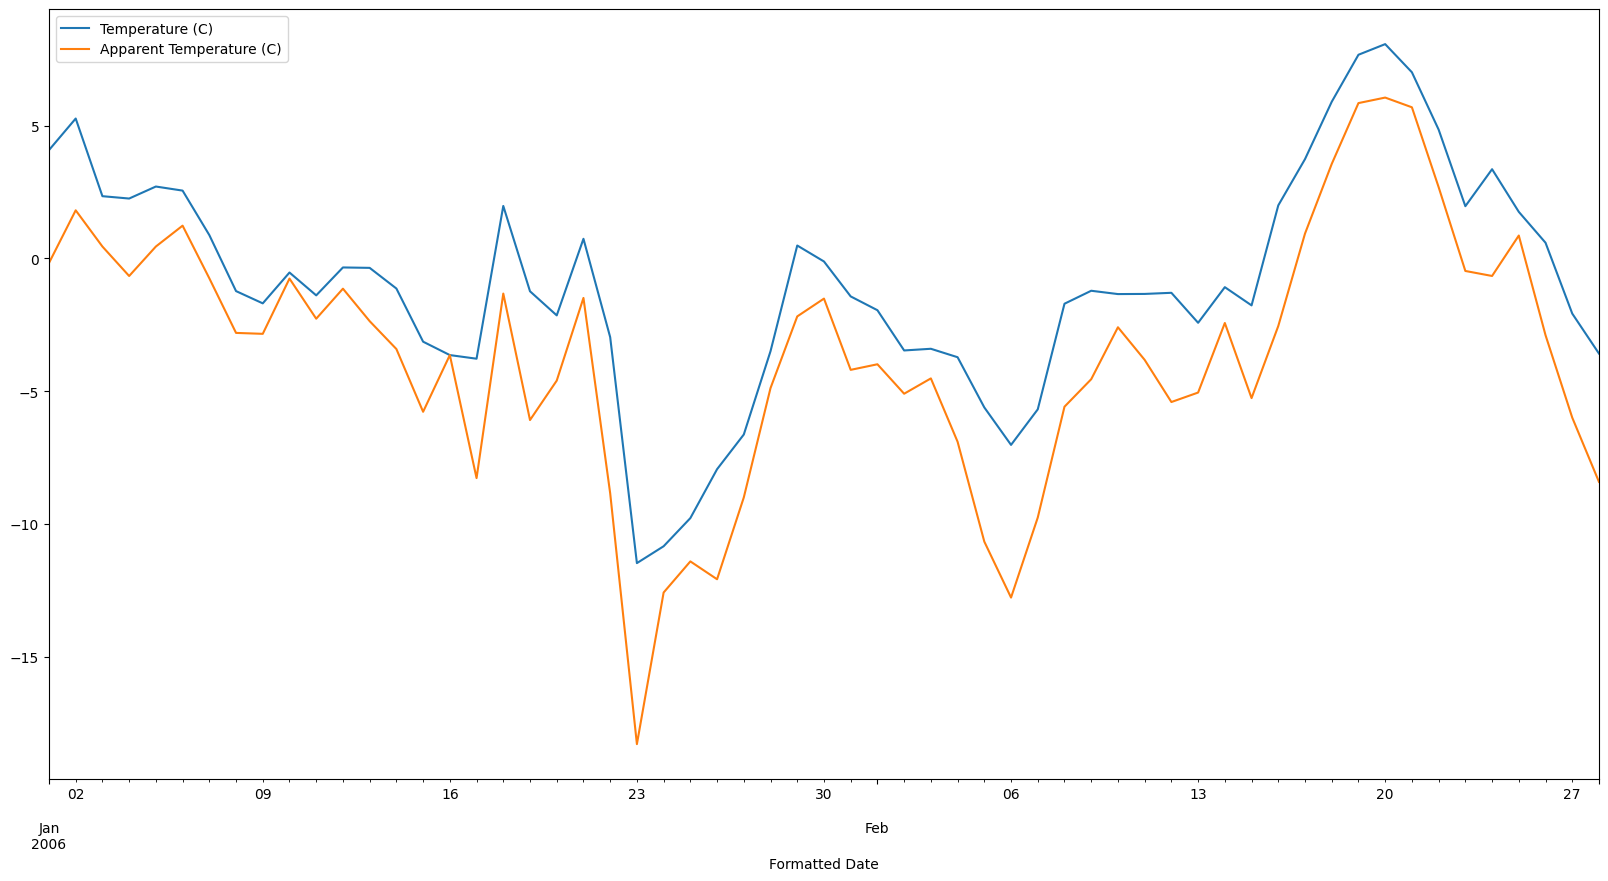

In [90]:
winter.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))
winter2.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))
spring.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))
summer.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))

### Data correlation

In [ ]:
indexed_df2.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.996030,-0.574989,-0.181508,-0.150195
Apparent Temperature (C),0.996030,1.000000,-0.561001,-0.236953,-0.145961
Humidity,-0.574989,-0.561001,1.000000,-0.024345,0.117712
Wind Speed (km/h),-0.181508,-0.236953,-0.024345,1.000000,-0.074545
Pressure (millibars),-0.150195,-0.145961,0.117712,-0.074545,1.000000


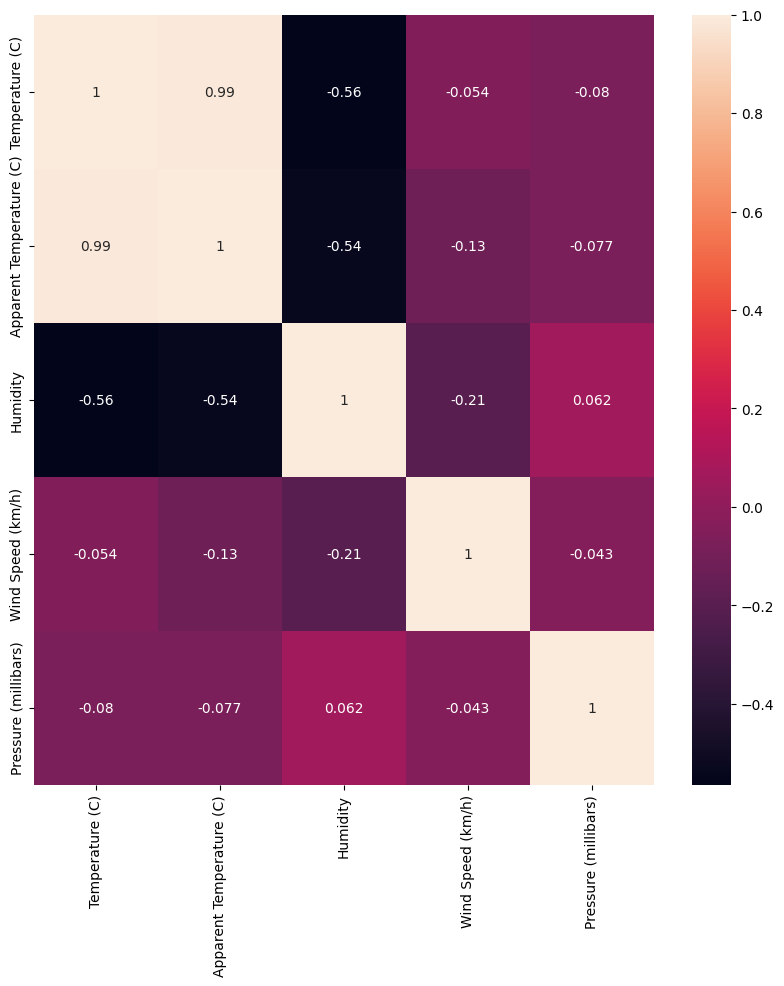

In [ ]:
# Plotting the correlation to get a bigger picture

plt.figure(figsize=(10,10))
sns.heatmap(indexed_df.corr(),annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Temperature (C)           5999 non-null   float64            
 2   Apparent Temperature (C)  5999 non-null   float64            
 3   Humidity                  5999 non-null   float64            
 4   Wind Speed (km/h)         5999 non-null   float64            
 5   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 281.3 KB


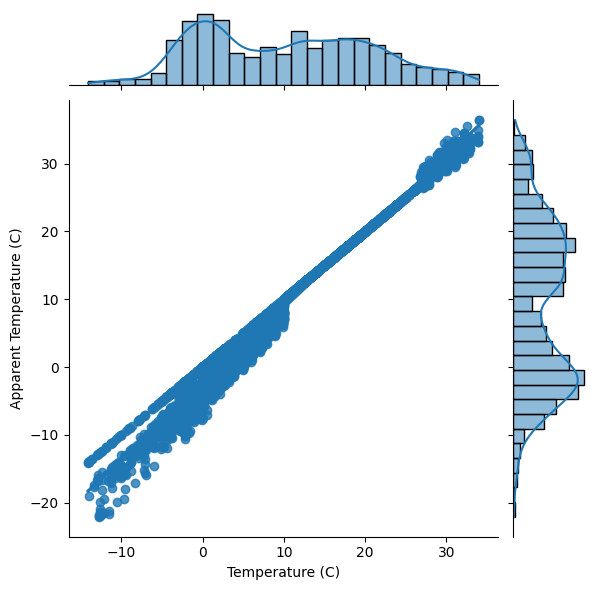

In [ ]:
sns.jointplot(x='Temperature (C)',y='Apparent Temperature (C)',data=indexed_df,kind='reg')

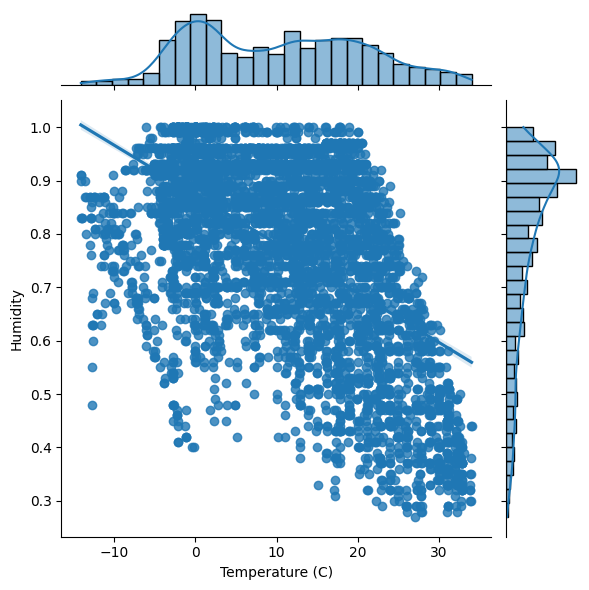

In [ ]:
sns.jointplot(x='Temperature (C)',y='Humidity',data=indexed_df,kind='reg')

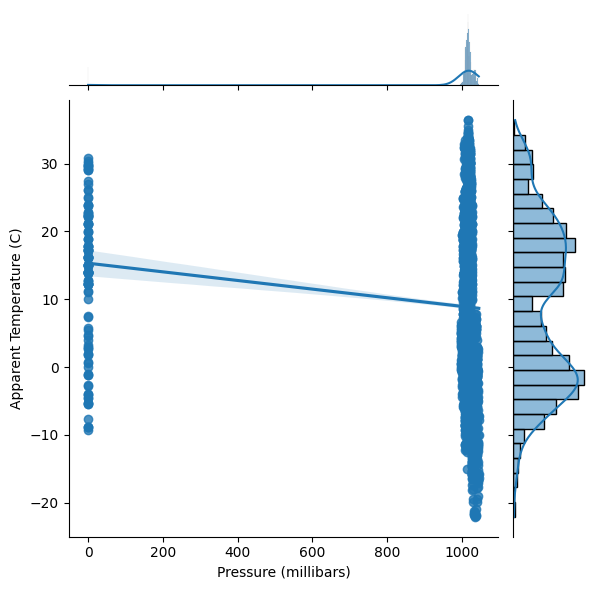

In [ ]:
sns.jointplot(x='Pressure (millibars)',y='Apparent Temperature (C)',data=indexed_df,kind='reg')

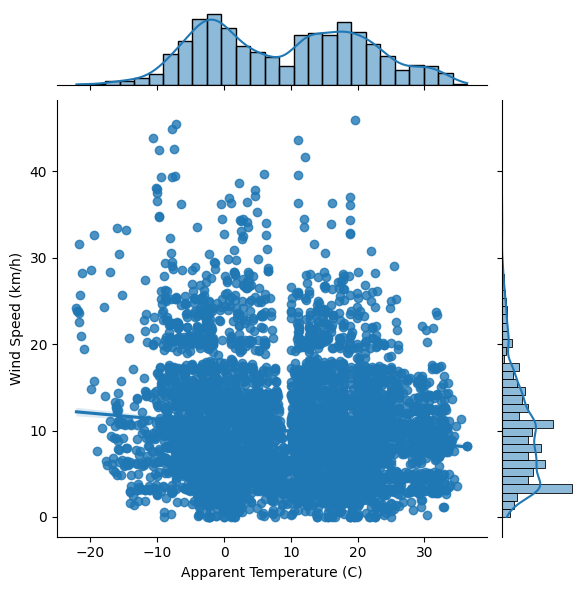

In [ ]:
sns.jointplot(x='Apparent Temperature (C)',y=indexed_df['Wind Speed (km/h)'],data=indexed_df,kind='reg')

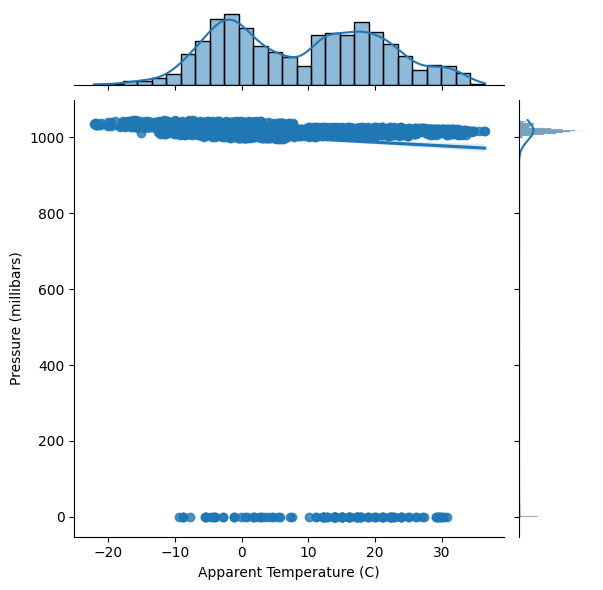

In [ ]:
sns.jointplot(x='Apparent Temperature (C)',y=indexed_df['Pressure (millibars)'],data=indexed_df,kind='reg')

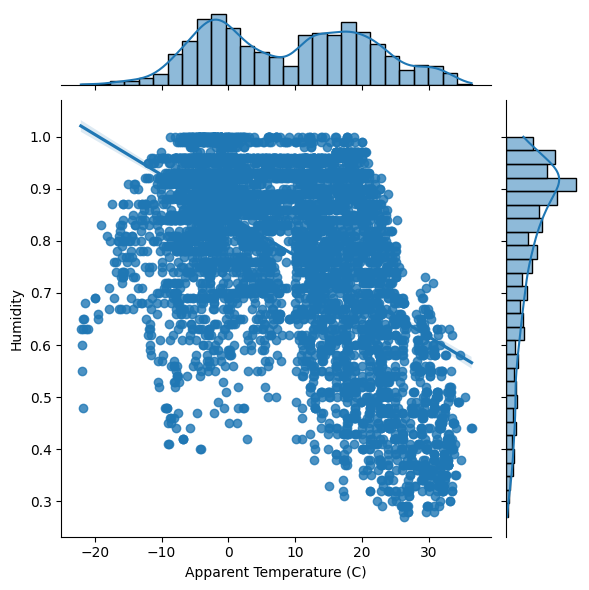

In [ ]:
sns.jointplot(x='Apparent Temperature (C)',y=indexed_df['Humidity'],data=indexed_df,kind='reg')

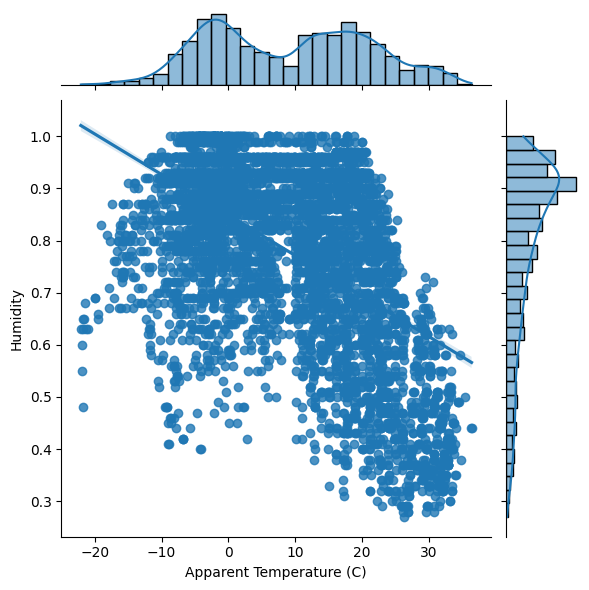

In [ ]:
sns.jointplot(x='Apparent Temperature (C)',y='Humidity',data=indexed_df,kind='reg')

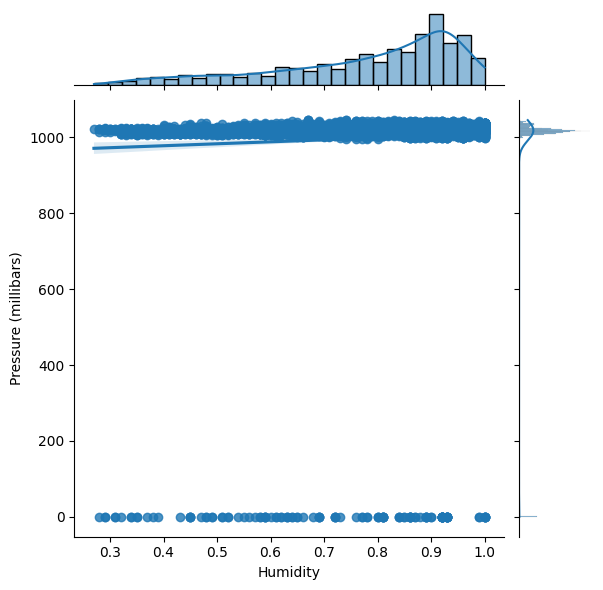

In [ ]:
sns.jointplot(x='Humidity',y=indexed_df['Pressure (millibars)'],data=indexed_df,kind='reg')

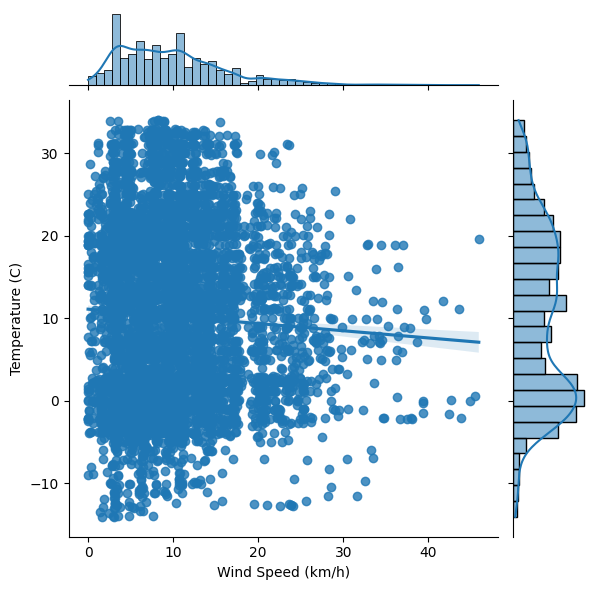

In [ ]:
sns.jointplot(x='Wind Speed (km/h)',y='Temperature (C)',data=indexed_df,kind='reg')

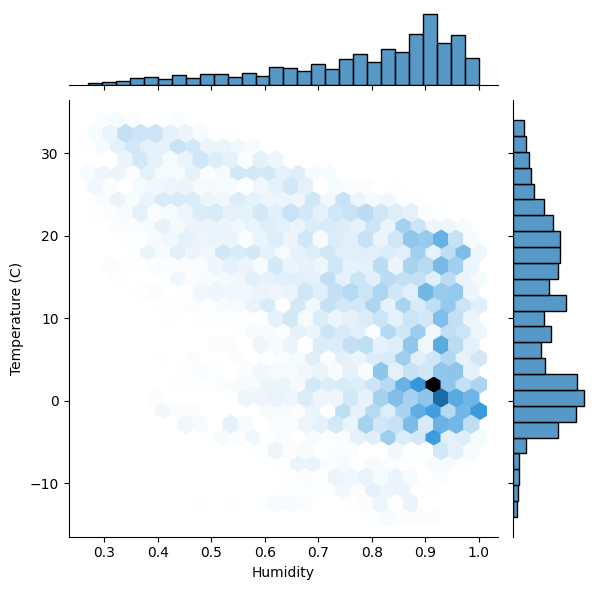

In [ ]:
sns.jointplot(x='Humidity',y='Temperature (C)',data=indexed_df,kind='hex')

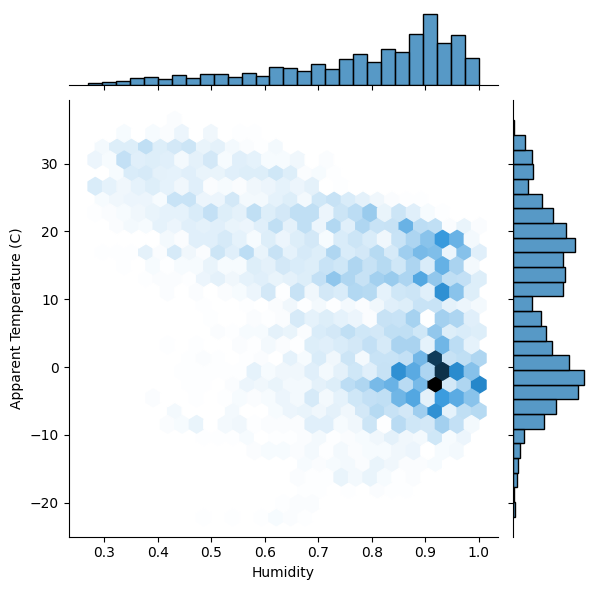

In [ ]:
sns.jointplot(x='Humidity',y='Apparent Temperature (C)',data=indexed_df,kind='hex')

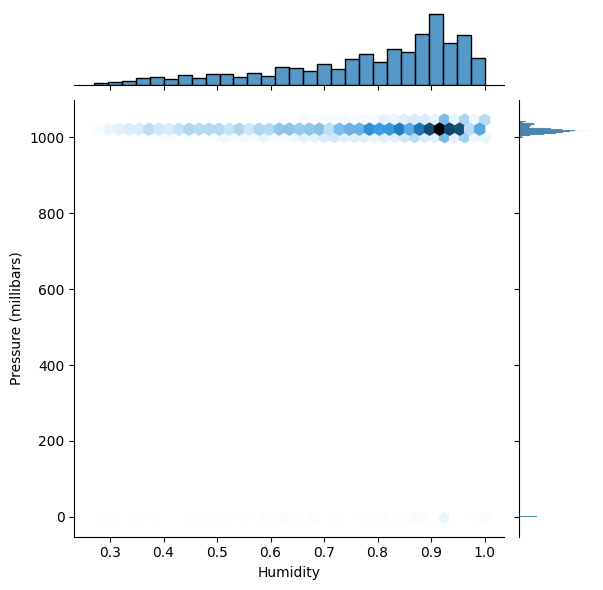

In [ ]:
sns.jointplot(x='Humidity',y='Pressure (millibars)',data=indexed_df,kind='hex')

<Figure size 2000x2000 with 0 Axes>

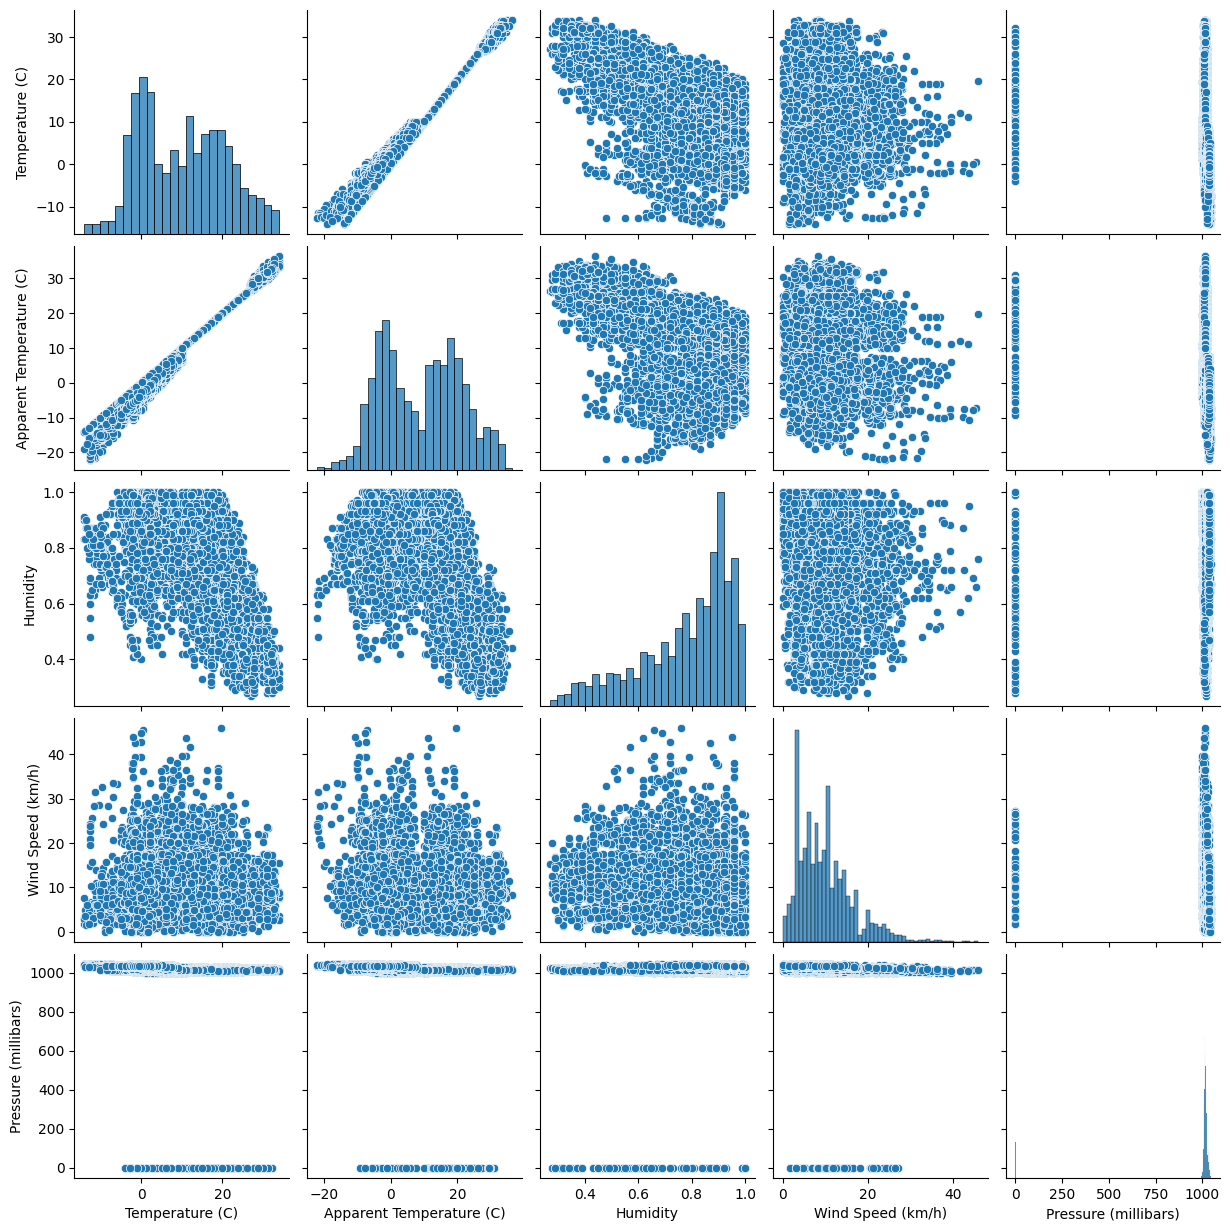

In [ ]:
# Paiting different parameter correlation

plt.figure(figsize=(20,20))
sns.pairplot(indexed_df)
plt.show()

In [ ]:
# Test/train split

X = indexed_df.drop('Apparent Temperature (C)', axis=1)  # Features
y = indexed_df['Apparent Temperature (C)']  # Target variable


In [ ]:
X.head(5)

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2005-12-31 23:00:00+00:00,0.577778,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,0.86,13.9426,1014.98


In [ ]:
y.head(5)

Formatted Date
2005-12-31 23:00:00+00:00   -4.050000
2006-01-01 00:00:00+00:00   -3.238889
2006-01-01 01:00:00+00:00   -3.155556
2006-01-01 02:00:00+00:00   -2.194444
2006-01-01 03:00:00+00:00   -2.744444
Name: Apparent Temperature (C), dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
regr.score(X_test,y_test)

0.9908301639971132

### Showin actual Apparent temperature vs predicted Apparent temperature

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sort_index()

,Actual,Predicted
Formatted Date,,
2006-01-01 07:00:00+00:00,-2.850000,-1.734397
2006-01-01 11:00:00+00:00,0.805556,1.506627
2006-01-01 13:00:00+00:00,3.677778,3.865833
2006-01-01 14:00:00+00:00,2.811111,2.979789
2006-01-01 16:00:00+00:00,2.250000,2.862943
...,...,...
2006-12-31 10:00:00+00:00,-2.833333,-3.082234
2006-12-31 13:00:00+00:00,-0.511111,0.066159
2006-12-31 15:00:00+00:00,-2.233333,-1.752931


### Calculation of prediction error

In [ ]:
from sklearn import metrics

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error:  1.2894342830955925
Mean Absolute Error:  0.8980220295678545
Root Mean Square Error:  1.2894342830955925


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = GBR.predict(X_test)

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error:  0.07130311692776325
Mean Absolute Error:  0.17909467688353556
Root Mean Square Error:  0.267026434885693


In [ ]:
from lightgbm import LGBMRegressor

LGB = LGBMRegressor()

LGB.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 4199, number of used features: 4
[LightGBM] [Info] Start training from score 9.124707


LGBMRegressor()

In [ ]:
y_pred = LGB.predict(X_test)

In [ ]:
print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error:  0.04887792125642346
Mean Absolute Error:  0.11842466216139666
Root Mean Square Error:  0.22108351647380556


In [ ]:
from catboost import CatBoostRegressor

CB = CatBoostRegressor()

CB.fit(X_train,y_train)

Learning rate set to 0.051361
0:	learn: 11.3776718	total: 5.75ms	remaining: 5.74s
1:	learn: 10.8419669	total: 8.89ms	remaining: 4.44s
2:	learn: 10.3425368	total: 12.1ms	remaining: 4.03s
3:	learn: 9.8651060	total: 15.4ms	remaining: 3.84s
4:	learn: 9.3962363	total: 20.5ms	remaining: 4.07s
5:	learn: 8.9596838	total: 23.6ms	remaining: 3.91s
6:	learn: 8.5403339	total: 26.6ms	remaining: 3.78s
7:	learn: 8.1439590	total: 29.4ms	remaining: 3.65s
8:	learn: 7.7814348	total: 32.5ms	remaining: 3.58s
9:	learn: 7.4163619	total: 38.9ms	remaining: 3.85s
10:	learn: 7.0714812	total: 43.7ms	remaining: 3.93s
11:	learn: 6.7499414	total: 47.5ms	remaining: 3.91s
12:	learn: 6.4364091	total: 59.2ms	remaining: 4.49s
13:	learn: 6.1434384	total: 63ms	remaining: 4.44s
14:	learn: 5.8568291	total: 68.7ms	remaining: 4.51s
15:	learn: 5.5940231	total: 72.1ms	remaining: 4.43s
16:	learn: 5.3540485	total: 76.7ms	remaining: 4.43s
17:	learn: 5.1161792	total: 88.6ms	remaining: 4.83s
18:	learn: 4.8897358	total: 96.3ms	remainin

In [ ]:
y_pred = CB.predict(X_test)

In [ ]:
print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error:  0.04418189330441778
Mean Absolute Error:  0.13605809240727823
Root Mean Square Error:  0.2101948936211767


In [ ]:
from sklearn.ensemble import StackingRegressor

estimatoins = [('regr',regr), ('xgb',GBR), ('LGB',LGB), ('CB',CB)]

CFL = StackingRegressor(estimators=estimatoins)

CFL.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 4199, number of used features: 4
[LightGBM] [Info] Start training from score 9.124707
Learning rate set to 0.051361
0:	learn: 11.3776718	total: 3.53ms	remaining: 3.53s
1:	learn: 10.8419669	total: 6.04ms	remaining: 3.02s
2:	learn: 10.3425368	total: 8.6ms	remaining: 2.86s
3:	learn: 9.8651060	total: 13.3ms	remaining: 3.32s
4:	learn: 9.3962363	total: 16.1ms	remaining: 3.2s
5:	learn: 8.9596838	total: 18.6ms	remaining: 3.08s
6:	learn: 8.5403339	total: 21.1ms	remaining: 2.99s
7:	learn: 8.1439590	total: 23.6ms	remaining: 2.92s
8:	learn: 7.7814348	total: 28.6ms	remaining: 3.15s
9:	learn: 7.4163619	total: 31.7ms	remaining: 3.14s
10:	learn: 7.0714812	total: 35.4ms	remai

StackingRegressor(estimators=[('regr', LinearRegression()),
                              ('xgb', GradientBoostingRegressor()),
                              ('LGB', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x0000014F207A2750>)])

In [ ]:
y_pred = CFL.predict(X_test)

In [ ]:
print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error:  0.02963306492032298
Mean Absolute Error:  0.10478813344960387
Root Mean Square Error:  0.1721425714932915
